[View in Colaboratory](https://colab.research.google.com/github/tchappui/heia-course-chemical-process-intensification/blob/master/Part1/S04_Exercise2.ipynb)

# Exercise 2

## Import the needed libraries

In [0]:
# vectors and linear algebra
import numpy as np

# visualization tools
import matplotlib.pyplot as plt

# solvers to integrate ordinary differential equations
import scipy.integrate as solvers

## Define the constants

In [0]:
k1 = 1.4e-3 # m3/kg-cat*s
k2 = 1.46e-3 # m3/kg-cat*s
k3 = 7.65e-5 # m3/kg-cat*s

Vdot = 0.0025 # m3/s

CA0 = 10 # mol/m3 (Benzene)
CB0 = 0 # mol/m3 (maleic anhydride)
CC0 = 0 # mol/m3 (CO2 produced in consecutive reaction 2)
CD0 = 0 # mol/m3 (CO2 produced in consecutive reaction 3)

## Define the equations to solve

In [0]:
def equations(variables, W, k1, k2, k3, Vdot):
    CA, CB, CC, CD = variables

    r1 = k1 * CA
    r2 = k2 * CB
    r3 = k3 * CA

    RA = -r1 - r3
    RB = r1 - r2
    RC = 4 *r2
    RD = 6 * r3

    dCA = RA / Vdot
    dCB = RB / Vdot
    dCC = RC / Vdot
    dCD = RD / Vdot

    return dCA, dCB, dCC, dCD

## Define the initial conditions and the integration domain

In [0]:
initial_conditions = [CA0, CB0, CC0, CD0] 
W = np.linspace(1, 10, 1001)

## Call the solver to find a solution

In [0]:
results = solvers.odeint(equations, initial_conditions, W, (k1, k2, k3, Vdot))

## Visualization of the results

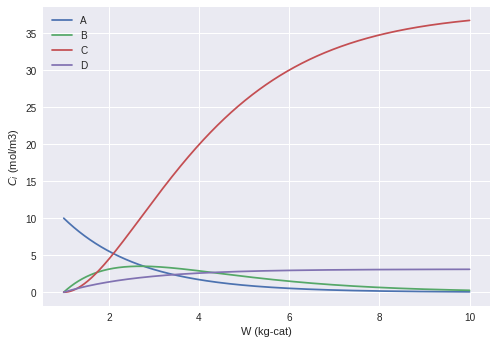

In [7]:
plt.plot(W, results)
plt.xlabel('W (kg-cat)')
plt.ylabel('$C_{i}$ (mol/m3)')
plt.legend(['A', 'B', 'C', 'D'])
plt.show()